# Text Classification Neural Net

The baseline model for classificaiton, performed well enough that in real world conditions I'd probably leave well enough alone.  However, I wanted to try making a simple neural net for this, as well as using a state of the art model (BERT) to compare performance.  given that the baseline did so well, I would imagine applying neural nets or even transformers would make the results nearly at 100 % accuracy. 

Here for the simple neural, it follows similar to the baseline model, I'm using one hot encoding and keras libraries to implement the ANN.

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\evaluation.csv
data\test.csv
data\train.csv


In [6]:
input_data_path = 'data/'
training_data_file = 'train.csv'
df = pd.read_csv(input_data_path + training_data_file,encoding='cp1252')
df.head()

,id,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [7]:
df['label'].value_counts()

1    13239
0    11099
Name: label, dtype: int64

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import regularizers
from keras.layers import Dropout
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [9]:
# split data into train and validation sets: df_train and df_val
from sklearn.model_selection import train_test_split

X = df['title'].copy()
y = df['label'].copy()

categories = y.unique()


X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train_raw)

6538     Former Trump adviser Flynn's son being probed ...
11573    FBI DIRECTOR COMEY’S Decision On Hillary Clint...
4058     Trump to give major North Korea speech, then p...
9159     re we are being set up for higher interest rat...
22242    Draft Senate healthcare bill would link subsid...
                               ...                        
21575    HILLARY’S STATE DEPARTMENT DESTROYED 13 Of Her...
5390     Second House panel approves Obamacare replacem...
860      Six civilians killed by roadside bomb in Afgha...
15795    Congress moves closer to final tax bill with H...
23654    (Video) Hilarious! Donald Trump on Jimmy Fallo...
Name: title, Length: 19470, dtype: object


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import seaborn as sns
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

# an alternative is to use term frequency:
#from sklearn.feature_extraction.text import CountVectorizer
#one_hot_vectorizer = CountVectorizer(binary=True)
#X_train = one_hot_vectorizer.fit_transform(X_train_raw))

print(f"X_train.shape = {X_train.shape}")
print(X_train)

print(f"Number of samples: {X_train.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")



X_train.shape = (19470, 16806)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of samples: 19470
Number of features: 16806


In [33]:
# Transforming our target vatiable
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
target=y_train.values
target=target.reshape(-1,1)
target=onehotencoder.fit_transform(target).toarray()

print(target)


[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [24]:
target=pd.DataFrame(data=target,columns=['False','True'])
target.head()

,False,True
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [16]:
print(f"X_train_raw.shape = {X_train_raw.shape}")
print(f"X_val_raw.shape = {X_val_raw.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_val.shape = {y_val.shape}")
print(f"y_val.shape = {X.shape}") 
print(f"y.shape = {y.shape}")
print(f"X_train.shape = {X_train.shape}")
print(f"target.shape = {target.shape}")

X_train_raw.shape = (19470,)
X_val_raw.shape = (4868,)
y_train.shape = (19470,)
y_val.shape = (4868,)
y_val.shape = (24338,)
y.shape = (24338,)
X_train.shape = (19470, 16806)
target.shape = (19470, 2)


In [37]:
# source for code: https://www.kaggle.com/code/tango911/airline-sentiments

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import regularizers
from keras.layers import Dropout

clf=Sequential()
#adding layers to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001),input_dim=16806))
clf.add(Dropout(0.5))
#adding two more hidden layer to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.5))
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.5))
#adding output layer
clf.add(Dense(units=2,activation="softmax",kernel_initializer="uniform"))
#compiling ANN
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# #fitting ANN
hist=clf.fit(X_train,target,batch_size=32,epochs=4)

Epoch 1/4
609/609 [==============================] - 122s 200ms/step - loss: 1.4699 - accuracy: 0.8903
Epoch 2/4
609/609 [==============================] - 118s 194ms/step - loss: 0.4704 - accuracy: 0.9266
Epoch 3/4
609/609 [==============================] - 117s 193ms/step - loss: 0.4143 - accuracy: 0.9364
Epoch 4/4
609/609 [==============================] - 118s 193ms/step - loss: 0.3768 - accuracy: 0.9448


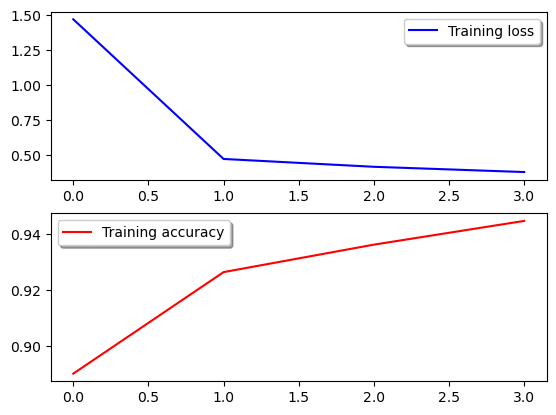

In [41]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='r', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Training Summary

This is the initial attempt with a neural net, a small amount of epochs yielded a 94 percent accuracy on the training data.  Not too bad, still need to test the validation data to see if it has good results.  Also, this could be trained a little more, adding some more epochs would be the first thing I'd try, if I wanted to improve the model's performance.  However, I think this is a good run and pretty decent results as well.  

So, let's move on to the validation and see how we do

## Validation 

In [42]:
y_pred = clf.predict(X_train)

609/609 [==============================] - 8s 14ms/step


In [43]:
test_preds = np.apply_along_axis(np.argmax, 1, y_pred) 

In [44]:
print(test_preds[:5])

[1 0 1 0 1]


accuracy (on x_train): 0.9775


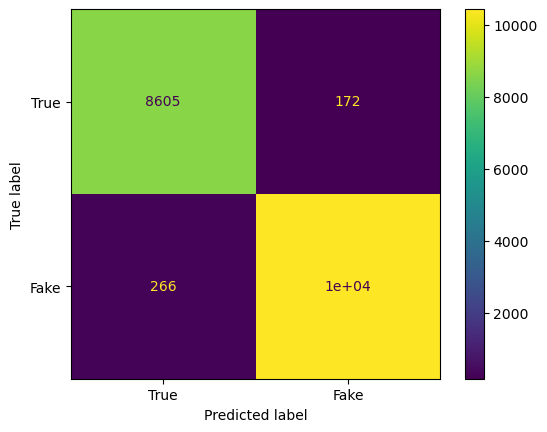

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

disp = ConfusionMatrixDisplay(confusion_matrix(test_preds, y_train), display_labels=['True', 'Fake'])
disp.plot()
print(f"accuracy (on x_train): {accuracy_score(y_train, test_preds):.4f}")

### Recap of ANN model and performance

Suprisingly, testing on validaiton did better than the training results, which is great! Nearly yeidling a 98 % accuracy on the validation data.  Again, I could go deeper (no pun intended) and maybe add some more epochs or play with the dropout rate.  Although there is still the BERT model to try as well and I'd like to see how they compare in terms of results, as they are kinda at opposite ends of complexity with respect to the models being used.

# Huggingface BERT model

I'm going to do a fresh run and start from scratch as to have a level playing field between the two models.  This is the example code provided used in assign 5, mainly this is something that I found worked for me locally, hence why I used it.  Quick side note, if I had worked from Kaggle and not from a local machine I'd like to have used high batches or maybe a different model besides "bert-base-cased".  That said, I will try to also get weights and biases used as well and see by adjusting some hyperparameters what will be the best adjustments to make.

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\evaluation.csv
data\test.csv
data\train.csv


In [2]:
input_data_path = 'data/'
training_data_file = 'train.csv'
df = pd.read_csv(input_data_path + training_data_file,encoding='cp1252')
df.head()

,id,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification,  TrainingArguments, Trainer, BertForSequenceClassification, AdamW, BertConfig
from datasets import Dataset, load_metric

c:\Users\User\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
MODEL_NAME = "bert-base-cased"
MAX_LENGTH=100

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3, max_length=MAX_LENGTH, output_attentions=False, output_hidden_states=False,ignore_mismatched_sizes=True)
model.config.pad_token_id = model.config.eos_token_id

Using eos_token, but it is not set yet.
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

In [5]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

bert.embeddings.word_embeddings.weight True
bert.embeddings.position_embeddings.weight True
bert.embeddings.token_type_embeddings.weight True
bert.embeddings.LayerNorm.weight True
bert.embeddings.LayerNorm.bias True
bert.encoder.layer.0.attention.self.query.weight True
bert.encoder.layer.0.attention.self.query.bias True
bert.encoder.layer.0.attention.self.key.weight True
bert.encoder.layer.0.attention.self.key.bias True
bert.encoder.layer.0.attention.self.value.weight True
bert.encoder.layer.0.attention.self.value.bias True
bert.encoder.layer.0.attention.output.dense.weight True
bert.encoder.layer.0.attention.output.dense.bias True
bert.encoder.layer.0.attention.output.LayerNorm.weight True
bert.encoder.layer.0.attention.output.LayerNorm.bias True
bert.encoder.layer.0.intermediate.dense.weight True
bert.encoder.layer.0.intermediate.dense.bias True
bert.encoder.layer.0.output.dense.weight True
bert.encoder.layer.0.output.dense.bias True
bert.encoder.layer.0.output.LayerNorm.weight True


In [6]:
sequence_0 = "Palestinians switch off Christmas lights in Bethlehem in anti-Trump protest"
seq0_tokens = tokenizer(sequence_0, return_tensors="pt")
print(f"number of tokens in seq0 is {len(seq0_tokens['input_ids'].flatten())}")
print(seq0_tokens)
model(**seq0_tokens).logits

number of tokens in seq0 is 14
{'input_ids': tensor([[  101, 23755,  6878,  1228,  3394,  4204,  1107, 21078,  1107,  2848,
           118,  8499,  5641,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


tensor([[-0.1153, -0.6747,  0.7134]], grad_fn=<AddmmBackward0>)

In [7]:
sequence_1 = "China says Trump call with Taiwan president won't change island's status"
seq1_tokens = tokenizer(sequence_1, return_tensors="pt")
print(f"number of tokens in seq1 is {len(seq1_tokens['input_ids'].flatten())}")
model(**seq1_tokens).logits

number of tokens in seq1 is 17


tensor([[-0.1807, -0.6106,  0.7472]], grad_fn=<AddmmBackward0>)

In [8]:
sequence_2 = " FAIL! The Trump Organization’s Credit Score Will Make You Laugh"
seq2_tokens = tokenizer(sequence_2, return_tensors="pt")
print(f"number of tokens in seq2 is {len(seq2_tokens['input_ids'].flatten())}")
model(**seq2_tokens).logits

number of tokens in seq2 is 17


tensor([[-0.1973, -0.7098,  0.7533]], grad_fn=<AddmmBackward0>)

In [9]:
ds_raw = Dataset.from_pandas(df[['label','title']])
ds_raw[0]

{'label': 1,
 'title': 'Palestinians switch off Christmas lights in Bethlehem in anti-Trump protest'}

In [10]:
def tokenize_function(examples):
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    return tokenizer(examples["title"], padding="max_length", truncation=True, max_length=MAX_LENGTH)

ds = ds_raw.map(tokenize_function, batched=True)

Parameter 'function'=<function tokenize_function at 0x00000259B51769D0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
 96%|█████████▌| 24/25 [00:01<00:00, 21.05ba/s]


In [11]:
ds

Dataset({
    features: ['label', 'title', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 24338
})

In [12]:
ds[0]

{'label': 1,
 'title': 'Palestinians switch off Christmas lights in Bethlehem in anti-Trump protest',
 'input_ids': [101,
  23755,
  6878,
  1228,
  3394,
  4204,
  1107,
  21078,
  1107,
  2848,
  118,
  8499,
  5641,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [13]:
ds = ds.shuffle(seed=42)
ds[0]

{'label': 1,
 'title': "Senate Majority leader cites 'good progress' on healthcare talks",
 'input_ids': [101,
  3279,
  23670,
  2301,
  20417,
  112,
  1363,
  5070,
  112,
  1113,
  12520,
  7430,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [14]:
train_prop = 0.85
ds_train = ds.select(range(int(len(ds)*train_prop)))
ds_eval = ds.select(range(int(len(ds)*train_prop), len(ds)))

In [15]:
print(f"len(ds_train) = {len(ds_train)}")
print(f"len(ds_eval) = {len(ds_eval)}")

len(ds_train) = 20687
len(ds_eval) = 3651


In [16]:
import gc
gc.collect()

41

In [17]:
import os
os.environ["WANDB_DISABLED"] = "True"

In [18]:
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(num_train_epochs=4, 
                                  do_train=True,
                                  report_to=None,
                                  output_dir="/kaggle/working",
                                  evaluation_strategy="steps",
                                  gradient_accumulation_steps=6,
                                  per_device_train_batch_size=32,
                                  per_device_eval_batch_size=61)

trainer = Trainer(model = model, 
                  args = training_args,
                  train_dataset = ds_train, 
                  eval_dataset = ds_eval,
                  compute_metrics = compute_metrics,
)

torch.set_grad_enabled(True)
trainer.train()
trainer.evaluate()

C:\Users\User\AppData\Local\Temp\ipykernel_28720\16396363.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: title. If title are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
c:\Users\User\miniconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_

{'train_runtime': 1028.5813, 'train_samples_per_second': 80.449, 'train_steps_per_second': 0.416, 'train_loss': 0.041337102373069694, 'epoch': 3.99}


100%|██████████| 60/60 [00:15<00:00,  3.94it/s]


{'eval_loss': 0.05380701273679733,
 'eval_accuracy': 0.9857573267597919,
 'eval_runtime': 15.4598,
 'eval_samples_per_second': 236.161,
 'eval_steps_per_second': 3.881,
 'epoch': 3.99}

# Huggingface pipelines

Huggingface's transformers have something called pipelines, which allow users to abstract the more complex tasks in NLP.  Things like text generation, sentiment analysis, and of course text summarization.  It is really easy to call and utilize, although come with some limitaitons.  Namely that you can only enter so much text at a time.  This is also why I used the article from NPR for this problem.  It was basically the size cap for the summarizer in the trasnformers pipeline.  

Also important to note, this attempt is using an abstractive summarization method on the article.  This is far more complex than the extractive method used in the baseline attempt, implementing things like: encoders and decoders, embedding layers, and attention masks.  Suffice to say, there is a lot more going on, under the hood, but this is really state of the art in terms of how it generates a genuine summary of an text or article.

In [6]:
from transformers import pipeline
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

summarizer = pipeline("summarization")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [7]:
text = """A dish of living brain cells has learned to play the 1970s arcade game Pong.
About 800,000 cells linked to a computer gradually learned to sense the position of the game's electronic ball and control a virtual paddle, a team reports in the journal Neuron.
The novel achievement is part of an effort to understand how the brain learns, and how to make computers more intelligent.
"We've made huge strides with silicon computing, but they're still rigid and inflexible," says Brett Kagan, an author of the study and chief scientific officer at Cortical Labs in Melbourne, Australia. "That's something we don't see with biology."
For example, both computers and people can learn to make a cup of tea, Kagan says. But people are able to generalize what they've learned in a way a computer can't.
"You might have never been to someone else's house, but with a bit of rummaging and searching you can probably make a decent cup of tea as long as I've got the ingredients," he says. But even a very powerful computer would struggle to carry out that task in an unfamiliar environment.
So Cortical Labs has been trying to understand how living brain cells acquire this sort of intelligence. And Kagan says the Pong experiment was a way for the company to answer a key question about how a network of brain cells learns to change its behavior:
"If we allow these cells to know the outcome of their actions, will they actually be able to change in some sort of goal-directed way," Kagan says.
To find out, the scientists used a system they've developed called DishBrain.A layer of living neurons is grown on a special silicon chip at the bottom of a thumb-size dish filled with nutrients. The chip, which is linked to a computer, can both detect electrical signals produced by the neurons, and deliver electrical signals to them.
To test the learning ability of the cells, the computer generated a game of Pong, a two-dimensional version of table tennis that gained a cult following as one of the first and most basic video games.
Pong is played on a video screen. A black rectangle defines the table, and a white cursor represents each player's paddle, which can be moved up or down to intercept a white ball.
In the simplified version used in the experiment, there was a single paddle on the left side of the virtual table, and the ball would carom off the other sides until it evaded the paddle.
To allow the brain cells to play the game, the computer sent signals to them indicating where the bouncing ball was. At the same time, it began monitoring information coming from the cells in the form of electrical pulses.
"We took that information and we allowed it to influence this Pong game that they were playing," Kagan says. "So they could move the paddle around."
At first, the cells didn't understand the signals coming from the computer, or know what signals to send the other direction. They also had no reason to play the game.
So the scientists tried to motivate the cells using electrical stimulation: a nicely organized burst of electrical activity if they got it right. When they got it wrong, the result was a chaotic stream of white noise.
"If they hit the ball, we gave them something predictable," Kagan says. "When they missed it, they got something that was totally unpredictable."
The strategy was based on the Free Energy Principle, which states that brain cells want to be able to predict what's going on in their environment. So they would choose predictable stimulation over unpredictable stimulation.
The approach worked. Cells began to learn to generate patterns of electrical activity that would move the paddle in front of the ball, and gradually rallies got longer.
The brain cells never got that good at Pong. But interestingly, human brain cells seemed to achieve a slightly higher level of play than mouse brain cells, Kagan says.
And the level of play was remarkable, considering that each network contained fewer cells than the brain of a cockroach, Kagan says.
"If you could see a cockroach playing a game of Pong and it was able to hit the ball twice as often as it was missing it, you would be pretty impressed with that cockroach," he says.
The results hint at a future in which biology helps computers become more intelligent by changing the way that they learn, Kagan says.
But that future is probably still a long way off, says Steve M. Potter, an adjunct associate professor at Georgia Tech.
"The idea of a computer that has some living components is exciting and it's starting to become a reality," he says. "However, the kinds of learning that these things can accomplish is quite rudimentary right now."
"""

In [8]:
summary_text = summarizer(text, max_length=130, min_length=30, do_sample=False)[0]['summary_text']
print(summary_text)

 Australian scientists develop a dish of living brain cells that learns to play Pong . The experiment is part of an effort to understand how the brain learns, and how to make computers more intelligent . A computer generated a game of Pong, a two-dimensional version of table tennis that gained a cult following in the 1970s .


## Summary

Here with the summarizer, we can quickly get a abstract summary generated to even the level of words or atleast character length we want them to be.  A really nice feature to have as we can adjust the summary to be the exact size we can.  To capture as much or little detail as we like.  

The abstract apporach to this is far more complicated than the extractive summary.  It is a state of the art model, so as to be expected.  It is just interesting to see how well the summaries generated work.  Even though this one is far smaller than the baseline, it is coherent and straight to the point.  I don't like the last bit as I feel its more or less irrelevant to the point of the story, but is true none the less.  In general it is fair to say I'd use this method over the baseline in a given situation, so long as the text isn't over the summarizer's limit.